In [1]:
from PIL import Image
import cv2
import numpy as np

In [43]:
root = '/home/l.kulikov/datasets/dataset_dhg1428/gesture_1/finger_1/subject_1/essai_2/'
gen_info = root + 'general_information.txt'
sk_world = root + 'skeleton_world.txt'
sk_image = root + 'skeleton_image.txt'
depth = root + 'depth_1.png'


gen_info = np.loadtxt(gen_info)
sk_image = np.loadtxt(sk_image)
sk_world = np.loadtxt(sk_world)
depth = cv2.imread(depth, 0) # Image.open(depth).convert('L')  #cv2.imread(depth)
# depth = (depth.astype(float) / depth.max() * 255).clip(0, 255)
# depth = depth.astype(np.uint8)

In [44]:
height_max, width_max = 0, 0
for gi in gen_info:
    width, height = gi[-2:]
    
    if width > width_max:
        width_max = width
        
    if height > height_max:
        height_max = height
        
height_max, width_max

(276.0, 270.0)

In [45]:
depth[np.nonzero(depth)]

array([7, 7, 7, ..., 1, 1, 1], dtype=uint8)

In [46]:
depth[401, 421]

0

In [47]:
sk_image[0]

array([360., 443., 354., 374., 331., 422., 292., 388., 260., 359., 246.,
       335., 321., 325., 318., 279., 311., 255., 304., 234., 351., 322.,
       351., 264., 352., 233., 349., 209., 378., 325., 384., 274., 387.,
       249., 389., 227., 411., 340., 430., 296., 439., 276., 444., 259.])

In [48]:
gen_info.shape

(61, 5)

In [49]:
depth.shape, depth.dtype, depth.min(), depth.max()

((480, 640), dtype('uint8'), 0, 7)

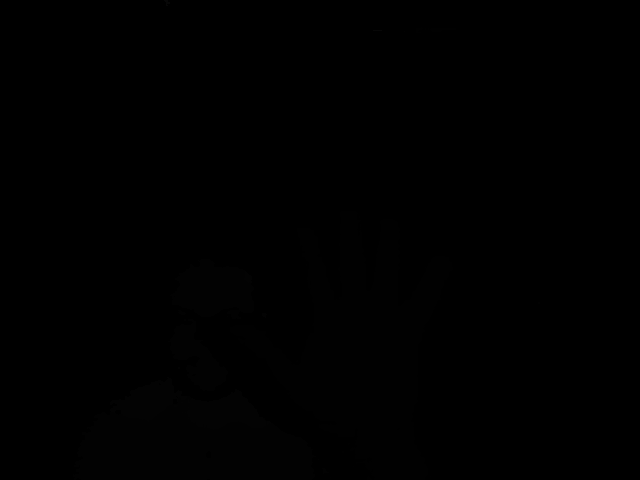

In [50]:
Image.fromarray(depth)

In [51]:
gen_info[0]

array([  0., 230., 208., 220., 232.])

In [52]:
x, y, width, height = gen_info[0][1:].astype(int)
width, height

(220, 232)

In [53]:
depth_crop = depth[y : y + height, x : x + width]
depth_crop[depth_crop == 0] = 255

In [54]:
depth_crop = np.repeat(depth_crop[:, :, None], 3, axis=2)

In [55]:
depth_crop.shape

(232, 220, 3)

In [56]:
sk_image[0][::2] = sk_image[0][::2] - x

In [57]:
sk_image[0]

array([130., 443., 124., 374., 101., 422.,  62., 388.,  30., 359.,  16.,
       335.,  91., 325.,  88., 279.,  81., 255.,  74., 234., 121., 322.,
       121., 264., 122., 233., 119., 209., 148., 325., 154., 274., 157.,
       249., 159., 227., 181., 340., 200., 296., 209., 276., 214., 259.])

In [58]:
sk_image[0][1::2] = sk_image[0][1::2] - y

In [59]:
sk_image = sk_image.astype(int)

In [60]:
sk_image.shape

(61, 44)

In [61]:
for i in range(0, 44, 2):
    depth_crop[sk_image[0][i + 1] - 5 : sk_image[0][i + 1] + 5, sk_image[0][i] - 5 : sk_image[0][i] + 5] = np.array([255, 0, 0])

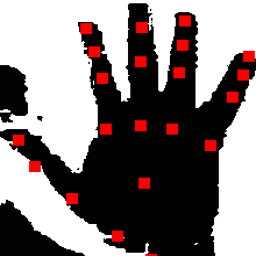

In [62]:
Image.fromarray(depth_crop).resize((256, 256))

In [224]:
depth_crop[110, 110]

array([85, 85, 85], dtype=uint8)

In [226]:
sk_world[0][:3]

array([ 0.35045181, -0.37298209,  0.361962  ])

In [64]:
np.clip(11, 0, 10)

10

In [34]:
cp = '/home/l.kulikov/dev/AWR-Adaptive-Weighting-Regression/data/nyu/center_train_refined.txt'
cp = np.loadtxt(cp)

In [35]:
cp.shape

(72757, 3)

In [36]:
data_path = '/home/l.kulikov/dev/AWR-Adaptive-Weighting-Regression/data/nyu/train'

In [37]:
def uvd2xyz(pts, paras, flip=1):
    # paras: (fx, fy, fu, fv)
    pts_xyz = pts.copy()
    pts_xyz = pts_xyz.reshape(-1, 3)
    pts_xyz[:, :2] = (pts_xyz[:, :2] - paras[2:]) * pts_xyz[:, 2:] / paras[:2]
    pts_xyz[:, 1] *= flip

    return pts_xyz.reshape(pts.shape).astype(np.float32)

In [204]:
sk_world.shape

(71, 66)

In [43]:
sk_world[0, :3], sk_image[0, :3]

(array([ 0.35045181, -0.37298209,  0.361962  ]), array([426., 475., 427.]))

In [218]:
paras = (588.03, 587.07, 320., 240.)
# paras = (322.3, 322.3, 320., 240.)

In [219]:
print(sk_world[3, :3])
uvd2xyz(sk_image[3, :3], paras, -1) / 100

[ 0.34619334 -0.37191132  0.359627  ]


array([ 0.7498937, -1.7116868,  4.24     ], dtype=float32)

In [199]:
uvd = sk_image[0, :3]  # px, px, mm
uvd

array([426., 475., 427.])